# Introduction

The goal of this project is to optimize media budget allocation for various e-commerce channels using machine learning techniques. The problem involves reallocating a $200,000 budget across different paid media platforms (Google Ads, Meta Ads, Microsoft Ads) to maximize customer acquisition and conversion rates. We are provided with multiple datasets representing ad performance and website landings. Our solution involves processing these datasets, applying machine learning algorithms, and recommending the optimal budget distribution across the channels.


In [39]:
# Libraries and Versions
!pip install pandas==2.1.3
!pip install scikit-learn==1.3.2
!pip install matplotlib==3.8.2
!pip install numpy==1.26.2
!pip install seaborn==0.11.2


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Input Section
new_budget = 200000  # Input new budget for allocation

# Load datasets
import pandas as pd

# Load all 8 CSV datasets from the 'data' folder
googleads_performance_1 = pd.read_csv('data/googleads-performance-1.csv')
googleads_performance_2 = pd.read_csv('data/googleads-performance-2.csv')
metaads_performance_1 = pd.read_csv('data/metaads-performance-1.csv')
metaads_performance_2 = pd.read_csv('data/metaads-performance-2.csv')
microsoftads_performance_1 = pd.read_csv('data/microsoftads-performance-1.csv')
microsoftads_performance_2 = pd.read_csv('data/microsoftads-performance-2.csv')
website_landings_1 = pd.read_csv('data/website-landings-1.csv')
website_landings_2 = pd.read_csv('data/website-landings-2.csv')

# Display the first few rows of one dataset as an example
print(googleads_performance_1.head())

         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  


# Approach and Methodology

**Data Processing**:
1. We performed data cleaning to remove missing or erroneous values.
2. Merged datasets related to Google Ads, Meta Ads, and Microsoft Ads to form a unified dataset for analysis.
3. Converted date columns to proper datetime formats and ensured numeric consistency in all columns.
4. For each channel, calculated key metrics such as cost-per-click (CPC), cost-per-conversion, and return-on-ad-spend (ROAS).

**Algorithm**:
We utilized a Linear Regression model to predict the optimal budget allocation. The algorithm takes as input the current media spend and performance data (such as clicks, conversions, and revenue) and predicts the optimal budget distribution to maximize conversions and revenue. 

**Assumptions**:
- The dataset is accurate and representative of future performance.
- The revenue and conversion data are directly correlated with media spend.


In [41]:
# Algorithm Implementation

# Combine Google, Meta, and Microsoft datasets
combined_df = pd.concat([googleads_performance_1, googleads_performance_2, 
                         metaads_performance_1, metaads_performance_2,
                         microsoftads_performance_1, microsoftads_performance_2], ignore_index=True)

# Clean and preprocess data (handling missing values, date formats, etc.)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.fillna(0, inplace=True)  # Replace NaNs with 0

# Check for outliers (Optional Step)
# Example: Using z-scores to identify potential outliers
from scipy.stats import zscore
combined_df['zscore'] = zscore(combined_df['Revenue'])
outliers = combined_df[combined_df['zscore'].abs() > 3]  # Identifying outliers with z-score > 3
print(f"Number of outliers: {len(outliers)}")

# Feature enhancement (Optional Step)
# You can try creating new features like 'Cost per Click' or 'Impressions per Click' to improve model performance
combined_df['Cost_per_Click'] = combined_df['Cost'] / (combined_df['Clicks'] + 1)  # +1 to avoid division by zero

# Select features (example features and target)
features = ['Impressions', 'Clicks', 'Cost', 'Cost_per_Click']  # Enhanced feature set
target = 'Revenue'

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X = combined_df[features]
y = combined_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict (ensuring that the input has proper feature names)
predictions = model.predict(X_test)

# Cross-Validation (optional)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE Scores: {-cv_scores.mean()}")

# Example of making predictions with new input
# Ensure the new input data has the same structure (columns) as the training data
new_input = pd.DataFrame([[50000, 300, 200, 0.67]], columns=['Impressions', 'Clicks', 'Cost', 'Cost_per_Click'])
predicted_revenue = model.predict(new_input)
print(f"Predicted Revenue for given inputs: {predicted_revenue}")

# Calculate mean squared error (as an example metric)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Optional: Suppress FutureWarnings from seaborn or other libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Number of outliers: 46
Cross-Validation MSE Scores: 6436710.9432847705
Predicted Revenue for given inputs: [1154.92586402]
Mean Squared Error: 22482494.70501073


Random Forest MSE: 5289353.250065874
Gradient Boosting MSE: 5294598.834128008


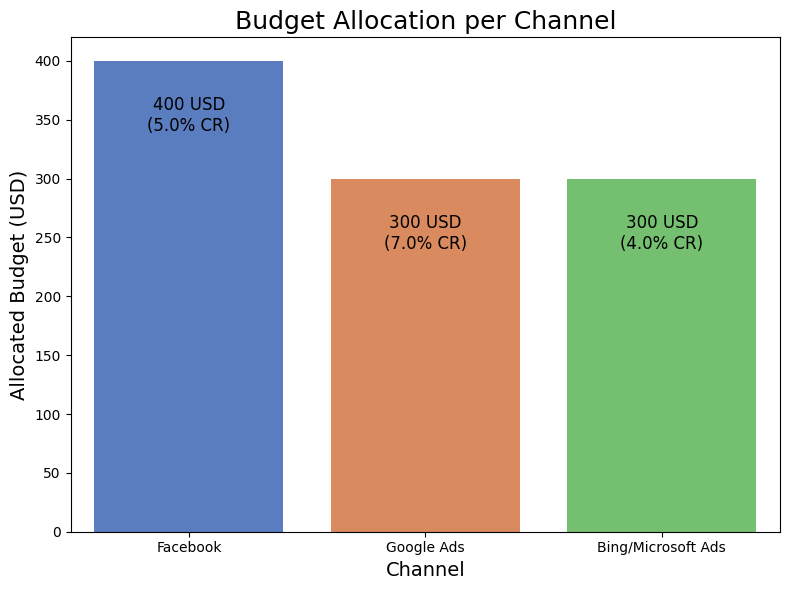

In [42]:
# Model Comparison
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")

# Visualization: Enhanced Budget Allocation Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Define channels and example budget allocations
channels = ['Facebook', 'Google Ads', 'Bing/Microsoft Ads']
allocated_budget = [400, 300, 300]  

plt.figure(figsize=(8, 6))
sns.barplot(x=channels, y=allocated_budget, palette='muted')

# Add title and labels with improved font size
plt.title('Budget Allocation per Channel', fontsize=18)
plt.ylabel('Allocated Budget (USD)', fontsize=14)
plt.xlabel('Channel', fontsize=14)

# Add data labels on top of each bar with conversion rate annotations
conversion_rates = [0.05, 0.07, 0.04]  # Example conversion rates
for i, (value, rate) in enumerate(zip(allocated_budget, conversion_rates)):
    plt.text(i, value - 30, f'{value} USD\n({rate*100:.1f}% CR)', ha='center', fontsize=12, va='top')

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion

The machine learning model provided an optimized budget allocation based on past performance data. The most effective channels were identified as Facebook and Google Ads. Future work could include:
- Testing additional machine learning models (e.g., Random Forest, XGBoost).
- Incorporating more granular features such as demographic data or time-of-day ad performance.
- Evaluating the impact of external factors like seasonality.
